In [247]:
import os
import numpy as np

from hyperpoints.utils import gather_rewards
from hyperpoints.utils.plots import reward_stats

from scipy.stats import ttest_ind, mannwhitneyu

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")

In [248]:
import warnings
warnings.filterwarnings('ignore')

In [249]:
def reward_stats(rewards, dim=0):
    """Get mean and standard deviation of rewards.

    Parameters
    ----------
    walks : pd.DataFrame
      Dataframe containing random walks as columns.
    """
    mean = np.array(rewards.mean())
    std_dev = np.array(rewards.std())
    upper = mean + std_dev
    lower = mean - std_dev
    stats = [upper, mean, lower]
    return stats

In [250]:
def get_stats(path, dim=0):
    """Get stats across the various seeds"""
    rewards = gather_rewards(path)
    stats = reward_stats(rewards, dim=0)
    plot_dist(stats[1])
    return rewards, stats

In [255]:
def plot_dist(dist):
    sns.set_context("paper")
    sns.set()
    sns.distplot(dist)

In [262]:
def stat_tests(dist1, dist2):
    _, welch_pvalue = ttest_ind(dist1, dist2, equal_var=False)
    _, mannwhit_pvalue = mannwhitneyu(dist1, dist2)
    print(f'Welch t-test p-value: {welch_pvalue}\nMann Whitney U p-value: {mannwhit_pvalue}')

In [256]:
def get_a2c_path(basepath: str, experiment: str) -> str:
    return os.path.join(basepath, experiment + '_breakout_a2c')

def get_acer_path(basepath: str, experiment: str) -> str:
    return os.path.join(basepath, experiment + '_enduro_acer')

def get_ppo_path(basepath: str, experiment: str) -> str:
    return os.path.join(basepath, experiment + '_qbert_ppo')

## Breakout A2C

### Paths

In [257]:
path = '/home/ygx/dev/nykyinen/vel/output/openai/'

hyperspace_a2c = '/home/ygx/dev/nykyinen/vel/output/openai/hyperspace_breakout_a2c'
hyperband_a2c = '/home/ygx/dev/nykyinen/vel/output/openai/hyperband_breakout_a2c'
skopt_a2c = get_a2c_path(path, 'skopt')
random_a2c = get_a2c_path(path, 'random')

### HyperSpace

Number of results: 22


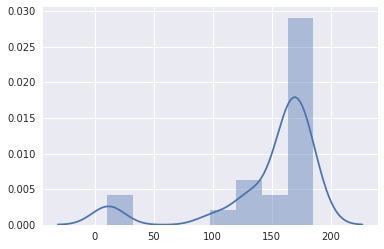

In [258]:
hyperspace_rewards, hyperspace_stats = get_stats(hyperspace_a2c)

### HyperBand

Number of results: 30


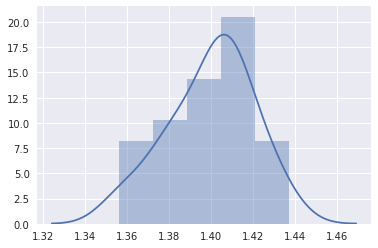

In [259]:
hyperband_rewards, hyperband_stats = get_stats(hyperband_a2c)

### Scikit-Optimize

Number of results: 55


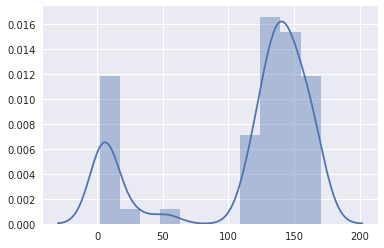

In [260]:
skopt_rewards, skopt_stats = get_stats(skopt_a2c)

### Random Search

Number of results: 50


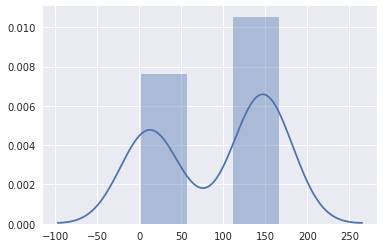

In [261]:
random_rewards, random_stats = get_stats(random_a2c)

### HyperSpace & HyperBand

In [187]:
stat_tests(hyperspace_stats[1], hyperband_stats[1])

Welch t-test p-value: 3.4491915955973032e-12
Mann Whitney U p-value: 5.208103229176053e-10


### HyperSpace & Scikit-Optimize

In [189]:
stat_tests(hyperspace_stats[1], skopt_stats[1])

Welch t-test p-value: 0.0134077150844666
Mann Whitney U p-value: 0.0001060594806536483


### HyperSpace & Random Search

In [190]:
stat_tests(hyperspace_stats[1], random_stats[1])

Welch t-test p-value: 0.0001995857188478673
Mann Whitney U p-value: 2.16514165933304e-05


## Enduro ACER

In [196]:
hyperspace_enduro = get_acer_path(path, 'hyperspace')
hyperband_enduro = get_acer_path(path, 'hyperband')
skopt_enduro = get_acer_path(path, 'skopt')
random_enduro = get_acer_path(path, 'random')

Number of results: 15


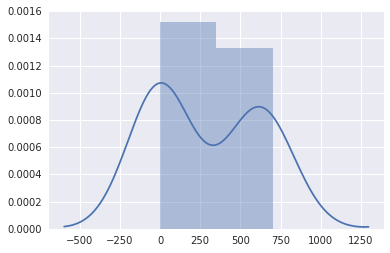

In [263]:
hyperspace_enduro_rewards, hyperspace_enduro_stats = get_stats(hyperspace_enduro)

Number of results: 50


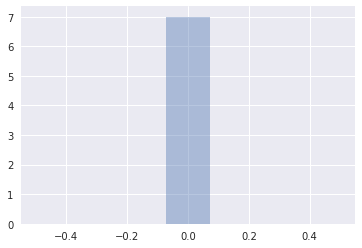

In [264]:
hyperband_enduro_rewards, hyperband_enduro_stats = get_stats(hyperband_enduro)

Number of results: 50


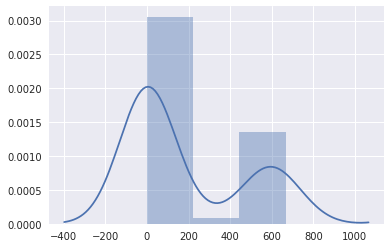

In [265]:
skopt_enduro_rewards, skopt_enduro_stats = get_stats(skopt_enduro)

Number of results: 12


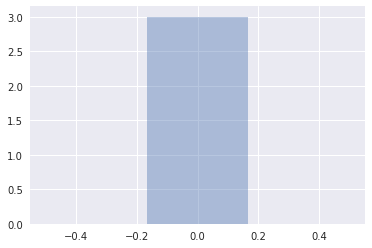

In [266]:
random_enduro_rewards, random_enduro_stats = get_stats(random_enduro)

### HyperSpace and Hyperband - Enduro ACER

In [267]:
stat_tests(hyperspace_enduro_stats[1], hyperband_enduro_stats[1])

Welch t-test p-value: 0.003755438112786882
Mann Whitney U p-value: 2.2210808403438984e-07


### HyperSpace and Scikit-Optimize - Enduro ACER

In [202]:
stat_tests(hyperspace_enduro_stats[1], skopt_enduro_stats[1])

Welch t-test p-value: 0.2746815303454056
Mann Whitney U p-value: 0.12575970597807573


### HyperSpace and Random Search - Enduro ACER

In [203]:
stat_tests(hyperspace_enduro_stats[1], random_enduro_stats[1])

Welch t-test p-value: 0.003755438112786882
Mann Whitney U p-value: 0.004302175826068135


## QBERT PPO

In [210]:
hyperspace_qbert = get_ppo_path(path, 'hyperspace')
hyperband_qbert = get_ppo_path(path, 'hyperband')
skopt_qbert = get_ppo_path(path, 'skopt')
random_qbert = get_ppo_path(path, 'rand')

Number of results: 50


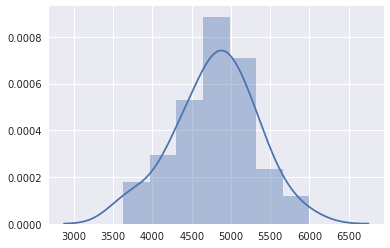

In [268]:
_, hyperspace_ppo_stats = get_stats(hyperspace_qbert)

Number of results: 78


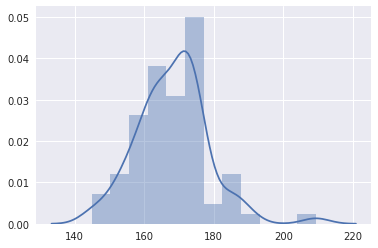

In [269]:
_, hyperband_ppo_stats = get_stats(hyperband_qbert)

Number of results: 27


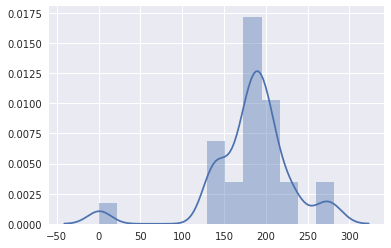

In [270]:
_, skopt_ppo_stats = get_stats(skopt_qbert)

Number of results: 40


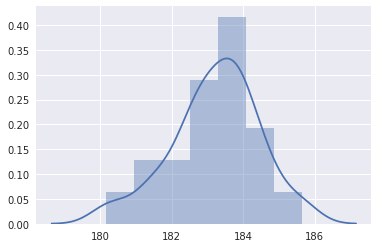

In [271]:
_, random_ppo_stats = get_stats(random_qbert)

### HyperSpace and HyperBand

In [272]:
stat_tests(hyperspace_ppo_stats[1], hyperband_ppo_stats[1])

Welch t-test p-value: 1.3648474434163363e-48
Mann Whitney U p-value: 8.568539336815217e-22


### HyperSpace and Scikit-Optimize

In [273]:
stat_tests(hyperspace_ppo_stats[1], skopt_ppo_stats[1])

Welch t-test p-value: 1.3414398395438517e-49
Mann Whitney U p-value: 3.001163360430853e-13


### HyperSpace and Random Search

In [274]:
stat_tests(hyperspace_ppo_stats[1], random_ppo_stats[1])

Welch t-test p-value: 1.6558457120597733e-48
Mann Whitney U p-value: 2.4106022829804652e-16
